In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from matplotlib import font_manager

In [2]:
# to fix the issue on missing font in matplotlib

# # 1. check all fonts matplotlib can see
# font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# # 2. add fonts without installing
# # 1) add all available fonts
# font_dirs = ['~/Library/Fonts/']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs, fontext='ttf')
# for font_file in font_files:
#     print(font_file)
#     font_manager.fontManager.addfont(font_file)
# # 2) directly add the specific font
# # font_manager.fontManager.addfont('~/Library/Fonts/Microsoft YaHei.ttf')

# # set plot font
# plt.rcParams['font.family'] = 'Microsoft YaHei'
# plt.rcParams['font.size'] = 13
# # plt.rcParams['axes.unicode_minus']=False

## 收集数据和预处理

### 收集数据

In [3]:
df_ads = pd.read_csv('./flower-express.csv', encoding='utf-8')
df_ads.head()

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


### 数据可视化

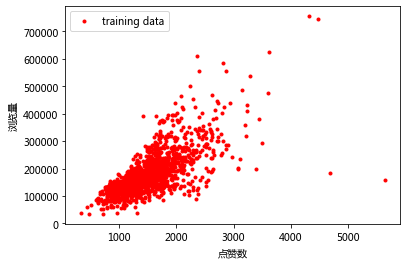

In [4]:
plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='training data')
plt.xlabel('点赞数')
plt.ylabel('浏览量')
plt.legend()
plt.show()

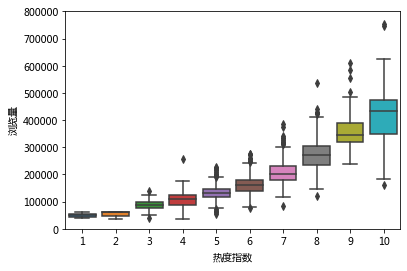

In [5]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sbn.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标


(-0.5, 8.5, 0.0, 4000.0)

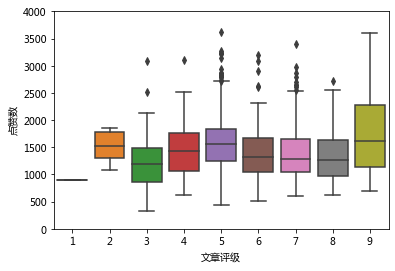

In [6]:
data = pd.concat([df_ads['点赞数'], df_ads['文章评级']], axis=1)
fig = sbn.boxplot(x='文章评级', y="点赞数", data=data)
fig.axis(ymin=0, ymax=4000)

### 数据清洗

In [7]:
df_ads.isna().sum()

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [8]:
# 删除NaN值
df_ads = df_ads.dropna()

### 构建监督学习的特征集和标签集

In [9]:
# 特征集
X = df_ads.drop(['浏览量'],axis=1)
# 标签集
y = df_ads['浏览量']

In [10]:
X.head()

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [11]:
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

### 拆分训练集、测试集和验证集

In [12]:
# 使用 train_test_split，将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.head()

,点赞数,转发数,热度指数,文章评级
673,1620,1620.0,9,5
308,1796,780.0,6,5
554,2358,907.0,6,8
1011,1718,832.0,7,5
833,1266,1266.0,7,5


In [14]:
X_test.head()

,点赞数,转发数,热度指数,文章评级
1074,1709,970.0,6,5
404,1440,1440.0,4,4
1375,1434,1454.0,7,5
1317,832,832.0,6,6
145,923,876.0,5,5


## 使用线性回归算法创建模型

In [15]:
# 导入线性回归算法模型
from sklearn.linear_model import LinearRegression

# 使用线性回归算法创建模型
# model = LinearRegression()
# model = LinearRegression(normalize=False, fit_intercept= True)
# model = LinearRegression(normalize=True, fit_intercept= False)
model = LinearRegression(normalize=True, fit_intercept= True)
# model = LinearRegression(normalize=False, fit_intercept= False)

### 使用训练集数据，训练机器，拟合函数，确定参数

In [16]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

### 预测测试集的Y值

In [17]:
y_pred = model.predict(X_test)


In [18]:
# 测试集特征数据
df_ads_pred = X_test.copy()
# 测试集标签真值
df_ads_pred['浏览量真值'] = y_test
# 测试集标签预测值
df_ads_pred['浏览量预测值'] = y_pred

df_ads_pred

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


### 散点图显示真实值和预测值

Text(0.5, 1.0, 'scatter view')

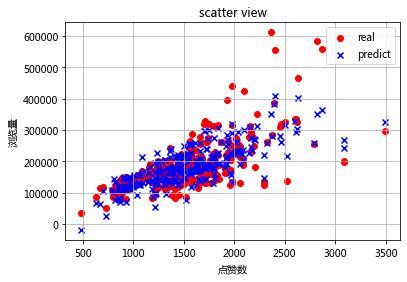

In [19]:
plt.scatter(df_ads_pred.点赞数, df_ads_pred.浏览量真值, c='r', marker='o', label="real")
plt.scatter(df_ads_pred.点赞数, df_ads_pred.浏览量预测值, c='b', marker="x", label="predict")
plt.grid(True)
plt.xlabel("点赞数")
plt.ylabel("浏览量")
plt.legend(loc='upper right')
plt.title("scatter view")

## 评估模型

In [20]:
print('当前模型的4个特征的权重分别是: ', model.coef_)
print('当前模型的截距（偏置）是: ', model.intercept_)


当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857178


In [21]:
print("线性回归预测集评分：", model.score(X_test, y_test))
print("线性回归训练集评分：", model.score(X_train, y_train))


线性回归预测集评分： 0.740552064611524
线性回归训练集评分： 0.7422107889561247


## 使用 GridSearchCV 寻找最优参数

In [22]:
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
# 建立需要搜索的参数的范围
param ={'fit_intercept':[True, False],'normalize': [True, False]}
# 初始化网格搜索的方法
grid = GridSearchCV(model,param)
#用网格搜索方法进行拟合数据
grid.fit(X, y)
# 输出最优的参数组合
print('最佳模型的参数组合：', grid.best_params_)
print('样本得分平均值:',grid.best_score_)
print('最佳模型测预测评分：',grid.score(X, y))

最佳模型的参数组合： {'fit_intercept': True, 'normalize': True}
样本得分平均值: 0.7386066056451244
最佳模型测预测评分： 0.7430492695069781


 ## 一个数据清洗的例子

In [23]:
import pandas as pd

data = [[100] ,['/'], ['-'], [99]]
columns = ['成绩']
df = pd.DataFrame(data=data, columns=columns)
df

,成绩
0,100
1,/
2,-
3,99


In [24]:
df['新成绩'] = pd.to_numeric(df.成绩.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df

,成绩,新成绩
0,100,100
1,/,0
2,-,0
3,99,99
